In [34]:
import os
import json
import pandas as pd

def load_result(folder_name):
  ret = []
  for fn in os.listdir(folder_name):
    if ".json" in fn:
      with open(f"{folder_name}/{fn}", "r") as f:
        ret.append(json.loads(f.read()))
  return ret

def merge_results(a, b):
  for x in a:
    for y in b:
      if x["data_id"] == y["data_id"]:
        x.update(y)

res = load_result("openml-cc18-res")
merge_results(res, load_result("openml-cc18-dummy"))
merge_results(res, load_result("openml-cc18-random-forest"))
merge_results(res, load_result("openml-cc18-ft-autotuned"))

In [35]:
res

[{'data_id': 1049,
  'name': 'pc4',
  'metric': 'roc_auc',
  'fasttext': [0.8219401041666666,
   0.8627387152777777,
   0.7781032986111109,
   0.8099330357142857,
   0.8180803571428572],
  'fasttext_100': [0.8412543402777777,
   0.8381076388888888,
   0.7825520833333334,
   0.8229910714285715,
   0.7975446428571429],
  'dummy': [0.5, 0.5, 0.5, 0.5, 0.5],
  'random_forest': [0.9040256076388888,
   0.9104275173611112,
   0.8596462673611112,
   0.8770647321428571,
   0.8616071428571429],
  'fasttext_auto': [0.8683810763888888,
   0.8792317708333333,
   0.8195529513888888,
   0.7328683035714285,
   0.8233258928571429]},
 {'data_id': 300,
  'name': 'isolet',
  'metric': 'neg_log_loss',
  'fasttext': [-3.258096720875293,
   -3.258096720875293,
   -3.258096720875293,
   -3.2658132136212705,
   -3.258096720875293],
  'fasttext_100': [-3.258096720875293,
   -3.258096720875293,
   -3.258096720875293,
   -3.258096720875293,
   -3.289305636300029],
  'dummy': [-3.2580981001487856,
   -3.2580981001

/var/folders/cg/7qw4190j34n5fvvh2k9knv7w0000gn/T/ipykernel_1217/4151798568.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['FastText', 'FastText Pretrained',


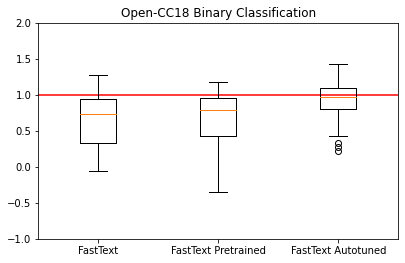

In [91]:
import numpy as np
import matplotlib.pyplot as plt

def scale(r, res_name):

  t = r[res_name] - np.mean(r['dummy'])
  b = np.mean(r["random_forest"]) - np.mean(r['dummy'])
  if b == 0.0:
    return 0.5
  return t / b

ft_scaled = []
ft_scaled_100 = []
ft_scaled_auto = []

for r in res:
  if r['metric'] == "neg_log_loss":
    continue
  scaled = scale(r, 'fasttext')
  scaled_100 = scale(r, 'fasttext_100')
  scaled_auto = scale(r, 'fasttext_auto')
#   print(np.mean(scaled), np.std(scaled))
#   print(np.mean(scaled_100), np.std(scaled_100))
#   print(np.mean(scaled_auto), np.std(scaled_auto))
  ft_scaled.append(np.mean(scaled))
  ft_scaled_100.append(np.mean(scaled_100))
  ft_scaled_auto.append(np.mean(scaled_auto))
  
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(5, 3))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
ax.set_ylim(-1, 2)
ax.set_title("Open-CC18 Binary Classification")
plt.axhline(1, color="red")
ax.set_xticklabels(['FastText', 'FastText Pretrained',
                    'FastText Autotuned'])
 
# Creating plot
bp = ax.boxplot([ft_scaled, ft_scaled_100, ft_scaled_auto])
 
# show plot
plt.show()

/var/folders/cg/7qw4190j34n5fvvh2k9knv7w0000gn/T/ipykernel_1217/280599690.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['FastText', 'FastText Pretrained',


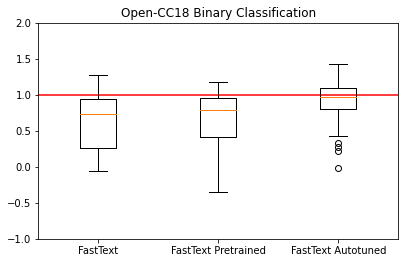

In [39]:
res = []
for fn in os.listdir("openml-cc18-res"):
  if ".json" not in fn:
    continue
  with open(f"openml-cc18-res/{fn}", "r") as f:
    res.append(json.loads(f.read()))

In [40]:
print("Number of datasets failed:", len([r['data_id'] for r in res if "name" not in r]))

fill_res = []
for r in res:
  if "name" not in r or "fasttext" not in r:
    continue
  else:
    fill_res.append(r)

print(len(fill_res))

Number of datasets failed: 0
72


In [42]:
import numpy as np

def format_scores(r_dict, clf_name):
  r_dict[f"{clf_name}_score_mean"] = np.mean(r_dict[clf_name])
  r_dict[f"{clf_name}_score_std"] = np.std(r_dict[clf_name])
  del r_dict[clf_name]

for r_dict in fill_res:
  format_scores(r_dict, "fasttext")
  format_scores(r_dict, "fasttext_100")

In [43]:
sorted([r['data_id'] for r in  fill_res])

[3,
 6,
 11,
 12,
 14,
 15,
 16,
 18,
 22,
 23,
 28,
 29,
 31,
 32,
 37,
 38,
 44,
 46,
 50,
 54,
 151,
 182,
 188,
 300,
 307,
 458,
 469,
 554,
 1049,
 1050,
 1053,
 1063,
 1067,
 1068,
 1461,
 1462,
 1464,
 1468,
 1475,
 1478,
 1480,
 1485,
 1486,
 1487,
 1489,
 1494,
 1497,
 1501,
 1510,
 1590,
 4134,
 4534,
 4538,
 6332,
 23381,
 23517,
 40499,
 40668,
 40670,
 40701,
 40923,
 40927,
 40966,
 40975,
 40978,
 40979,
 40982,
 40983,
 40984,
 40994,
 40996,
 41027]

In [44]:
import pandas as pd

df = pd.DataFrame.from_dict(fill_res)
df = df.round(3)
df = df.dropna()
df = df.sort_values("data_id")

for k, grouped_res in df.groupby("metric"):
  print(k)
  for i, r in grouped_res.iterrows():
    d_id = r['data_id']
    ds_name = r['name'].capitalize().replace('_', ' ')
    ft_mean = abs(r['fasttext_score_mean'])
    ft_std = r['fasttext_score_std']
    ft_pt_mean = abs(r['fasttext_100_score_mean'])
    ft_pt_std = r['fasttext_100_score_std']
    
    if k == "neg_log_loss":
      if ft_mean == ft_pt_mean:
        pass
      elif ft_mean > ft_pt_mean:
        ft_pt_mean = f"\\textbf{{{ft_pt_mean}}}"
      else:
        ft_mean = f"\\textbf{{{ft_mean}}}"
    else:
      if ft_mean == ft_pt_mean:
        pass
      elif ft_mean < ft_pt_mean:
        ft_pt_mean = f"\\textbf{{{ft_pt_mean}}}"
      else:
        ft_mean = f"\\textbf{{{ft_mean}}}"

    print(f"{d_id} & {ds_name} & {ft_mean} $\\pm$ {ft_std} & {ft_pt_mean} $\\pm$ {ft_pt_std} \\\\")

neg_log_loss
6 & Letter & \textbf{4.028} $\pm$ 0.01 & 4.129 $\pm$ 0.013 \\
11 & Balance-scale & \textbf{0.929} $\pm$ 0.018 & 0.93 $\pm$ 0.021 \\
12 & Mfeat-factors & 2.37 $\pm$ 0.085 & \textbf{1.668} $\pm$ 0.319 \\
14 & Mfeat-fourier & \textbf{2.303} $\pm$ 0.0 & 3.574 $\pm$ 1.59 \\
16 & Mfeat-karhunen & \textbf{2.303} $\pm$ 0.0 & 8.668 $\pm$ 0.733 \\
18 & Mfeat-morphological & \textbf{1.572} $\pm$ 0.295 & 2.145 $\pm$ 0.132 \\
22 & Mfeat-zernike & \textbf{2.303} $\pm$ 0.0 & 8.793 $\pm$ 0.864 \\
23 & Cmc & 1.064 $\pm$ 0.047 & \textbf{1.001} $\pm$ 0.026 \\
28 & Optdigits & 1.954 $\pm$ 0.008 & \textbf{1.862} $\pm$ 0.009 \\
32 & Pendigits & 1.869 $\pm$ 0.217 & \textbf{1.767} $\pm$ 0.269 \\
46 & Splice & 1.177 $\pm$ 0.125 & \textbf{1.087} $\pm$ 0.12 \\
54 & Vehicle & \textbf{1.385} $\pm$ 0.0 & 2.724 $\pm$ 0.229 \\
182 & Satimage & 0.951 $\pm$ 0.385 & \textbf{0.562} $\pm$ 0.026 \\
188 & Eucalyptus & \textbf{1.561} $\pm$ 0.008 & 2.217 $\pm$ 0.162 \\
300 & Isolet & \textbf{3.26} $\pm$ 0.003 & 3

In [53]:
from scipy.stats import wilcoxon

rank_ft, rank_ft100 = [], []
for _, x in df[df["metric"] == "neg_log_loss"].iterrows():
  if abs(x['fasttext_score_mean']) < abs(x['fasttext_100_score_mean']):
    rank_ft.append(1)
    rank_ft100.append(2)
  elif abs(x['fasttext_score_mean']) > abs(x['fasttext_100_score_mean']):
    rank_ft.append(2)
    rank_ft100.append(1)
  else:
    rank_ft.append(1.5)
    rank_ft100.append(1.5)
    

print(sum(rank_ft) / len(df[df["metric"] == "neg_log_loss"]), sum(rank_ft100) / len(df[df["metric"] == "neg_log_loss"]))
print(wilcoxon(rank_ft, rank_ft100))
print(wilcoxon(df[df["metric"] == "neg_log_loss"]["fasttext_score_mean"], df[df["metric"] == "neg_log_loss"]["fasttext_100_score_mean"]))


rank_ft, rank_ft100 = [], []
for _, x in df[df["metric"] == "roc_auc"].iterrows():
  if x['fasttext_score_mean'] > x['fasttext_100_score_mean']:
    rank_ft.append(1)
    rank_ft100.append(2)
  elif x['fasttext_score_mean'] < x['fasttext_100_score_mean']:
    rank_ft.append(2)
    rank_ft100.append(1)
  else:
    rank_ft.append(1.5)
    rank_ft100.append(1.5)
    
print(sum(rank_ft) / len(df[df["metric"] == "roc_auc"]), sum(rank_ft100) / len(df[df["metric"] == "roc_auc"]))
print(wilcoxon(rank_ft, rank_ft100))
print(wilcoxon(df[df["metric"] == "roc_auc"]["fasttext_score_mean"], df[df["metric"] == "roc_auc"]["fasttext_100_score_mean"]))


1.472972972972973 1.527027027027027
WilcoxonResult(statistic=314.5, pvalue=0.7388826803635273)
WilcoxonResult(statistic=272.0, pvalue=0.3378887837089046)
1.6428571428571428 1.3571428571428572
WilcoxonResult(statistic=181.5, pvalue=0.0770998717435417)
WilcoxonResult(statistic=177.5, pvalue=0.10571077139808886)


In [46]:
from scipy.stats import wilcoxon


wilcoxon(rank_ft, rank_ft100)

WilcoxonResult(statistic=181.5, pvalue=0.0770998717435417)

0.3378887837089046


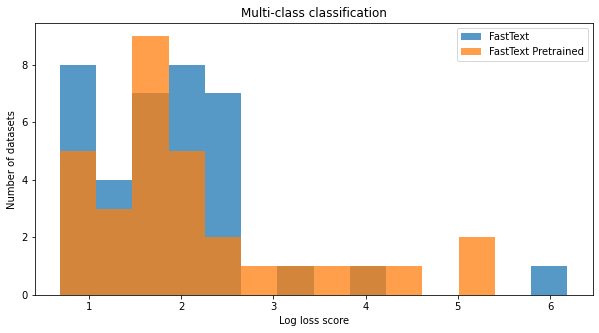

In [47]:
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
import numpy as np

res = wilcoxon(np.abs(df[df["metric"] == "neg_log_loss"]["fasttext_score_mean"]), np.abs(df[df["metric"] == "neg_log_loss"]["fasttext_100_score_mean"])).pvalue
print(res)
plt.figure(figsize=(10, 5))
plt.ylabel("Number of datasets")
plt.xlabel("Log loss score")
_, bins, _ = plt.hist(np.abs(df[df["metric"] == "neg_log_loss"]["fasttext_score_mean"]), alpha=0.75, label="FastText", bins=14)
plt.hist(np.abs(df[df["metric"] == "neg_log_loss"]["fasttext_100_score_mean"]), alpha=0.75, label="FastText Pretrained", bins=bins)
plt.legend()
plt.title('Multi-class classification')
plt.show()

0.10571077139808886


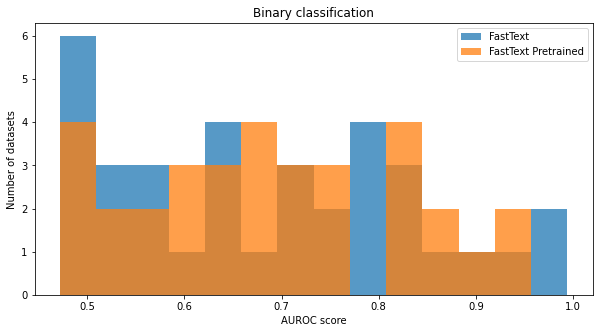

In [48]:
from scipy.stats import wilcoxon

res = wilcoxon(df[df["metric"] == "roc_auc"]["fasttext_score_mean"], df[df["metric"] == "roc_auc"]["fasttext_100_score_mean"]).pvalue
print(res)

plt.figure(figsize=(10, 5))
plt.ylabel("Number of datasets")
plt.xlabel("AUROC score")
_, bins, _ = plt.hist(df[df["metric"] == "roc_auc"]["fasttext_score_mean"], alpha=0.75, label="FastText", bins=14)
plt.hist(df[df["metric"] == "roc_auc"]["fasttext_100_score_mean"], alpha=0.75, label="FastText Pretrained", bins=bins)


plt.legend()
plt.title('Binary classification')
plt.show()